## FP-Growth

### O FP-Growth (Frequent Pattern Growth) é um algoritmo eficiente utilizado na mineração de padrões frequentes em grandes bases de dados, especialmente em problemas de análise de cestas de mercado. Ao contrário do algoritmo Apriori, que gera candidatos e verifica a frequência de cada um, o FP-Growth constrói uma estrutura de dados compacta chamada FP-Tree (árvore de padrões frequentes) para extrair diretamente os padrões frequentes. Isso torna o FP-Growth geralmente mais rápido e eficiente, especialmente em conjuntos de dados grandes e esparsos.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Principais Características do FP-Growth:

#### **-Estrutura Compacta:** Utiliza uma árvore de padrões frequentes (FP-Tree) que compacta a base de dados ao armazenar apenas os itens frequentes e suas contagens. Isso reduz significativamente o espaço necessário.

#### **-Eficiência:** Evita a geração de um grande número de candidatos, que é o principal gargalo do algoritmo Apriori. Isso faz com que o FP-Growth seja mais eficiente em termos de tempo de execução.

#### **-Divisão e Conquista:** Divide o problema original em subproblemas menores e resolve cada subproblema de forma independente. Isso permite a exploração eficiente de padrões frequentes.

#### **-Implementação:** Implementado em várias bibliotecas de aprendizado de máquina e mineração de dados, como mlxtend em Python.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Como o FP-Growth Funciona:

#### Construção da FP-Tree:

#### **Passo 1:** Varre a base de dados para calcular o suporte de cada item.
#### **Passo 2:** Filtra os itens que não atendem ao suporte mínimo.
#### **Passo 3:** Ordena os itens restantes em ordem decrescente de frequência.
#### **Passo 4:** Varre novamente a base de dados para construir a FP-Tree usando a ordem dos itens filtrados.

#### Mineração de Padrões Frequentes:

#### **Passo 1:** Inicia a mineração a partir dos nós mais profundos da FP-Tree.
#### **Passo 2:** Gera padrões frequentes para cada item baseando-se nos caminhos na árvore.
#### **Passo 3:** Cria subproblemas e constrói árvores condicionais para minerar padrões frequentes em cada subárvore.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
#Importação de Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

#### **matplotlib.pyplot** e **seaborn**: São bibliotecas usadas para visualização de dados.
#### **pandas**: Biblioteca usada para manipulação e análise de dados.
#### **mlxtend.frequent_patterns**: Módulo que contém funções para mineração de padrões frequentes, como fpgrowth e association_rules.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Carregar dados binários
file_path = 'datasets/PCY_binário.csv'
data = pd.read_csv(file_path)

#### **file_path**: Especifica o caminho do arquivo CSV contendo os dados binários.
#### **pd.read_csv(file_path)**: Carrega os dados do arquivo CSV em um DataFrame do pandas.

#### Os algoritmos de Associação trabalham com valores binários. Portanto aplicamos o dataset já processado "PCY_binário"

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Aplicar FP-Growth para encontrar itemsets frequentes
min_support = 0.05
frequent_itemsets_fp = fpgrowth(data, min_support=min_support, use_colnames=True)

#### **min_support**: Define o suporte mínimo para considerar um itemset como frequente.
#### **fpgrowth(data, min_support=min_support, use_colnames=True)**: Aplica o algoritmo FP-Growth aos dados para encontrar itemsets frequentes. O parâmetro use_colnames=True garante que os nomes das colunas originais sejam usados nos resultados.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Gerar regras de associação
min_confidence = 0.7
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence)

# Mostrar regras
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

#### **min_confidence**: Define a confiança mínima para gerar uma regra de associação.
#### **association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence)**: Gera regras de associação a partir dos itemsets frequentes utilizando confiança como métrica.
#### **rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']]**: Seleciona as colunas relevantes das regras geradas.
#### **print()**: Exibe as regras de associação com os respectivos antecedentes, consequentes, suporte, confiança e lift.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### O FP-Growth é amplamente utilizado em aplicações de mineração de dados onde a eficiência e a escalabilidade são cruciais, como em análise de cestas de mercado, detecção de fraudes, e recomendação de produtos.








## Vantagens do FP-Growth:
#### **Escalabilidade:** Capaz de lidar com grandes conjuntos de dados devido à sua eficiência em espaço e tempo.
#### **Menos I/O:** Requer menos leituras/escritas da base de dados, pois evita múltiplas varreduras completas.
#### **Redução de Espaço:** A FP-Tree é uma estrutura compacta que reduz significativamente a necessidade de armazenamento.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Desvantagens do FP-Growth:
#### **Complexidade de Implementação:** Mais complexo de implementar comparado ao Apriori.
#### **Memória:** Pode exigir muita memória para conjuntos de dados extremamente grandes se a FP-Tree não couber na memória.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **OBS -> Gerar gráficos: Está demorando demais para computar por conta do número elevado de itens e regras. Testar com dataset reduzido.**

#### Usamos um gráfico de dispersão para visualizar a relação entre a confiança e o lift das regras. O tamanho dos pontos é proporcional ao suporte das regras.

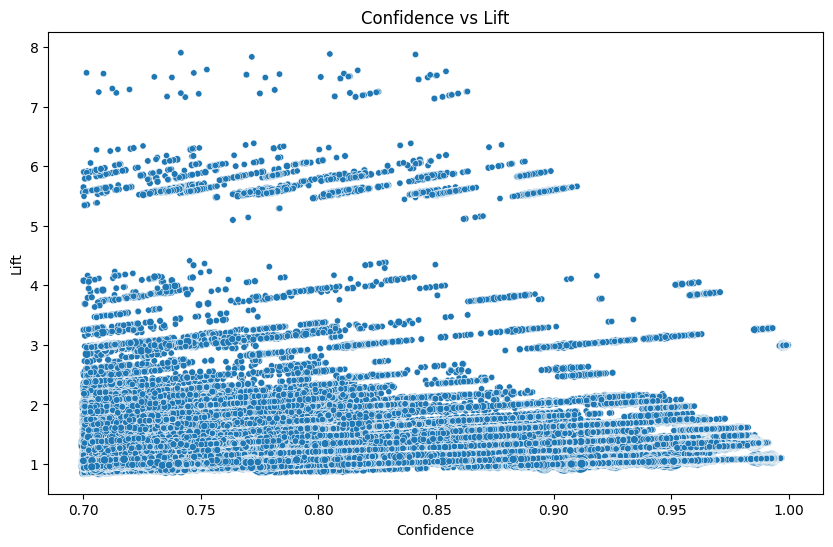

In [10]:
# Gráfico de Dispersão de Confiança vs. Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', data=rules_fp, legend=False, sizes=(20, 200))
plt.title('Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

#### Criamos um gráfico de barras para visualizar o suporte das regras. Cada barra representa uma regra de associação.

In [ ]:
# Gráfico de Barras do Suporte das Regras
plt.figure(figsize=(10, 6))
rules_fp['rule'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))
rules_fp = rules_fp.sort_values('support', ascending=False).reset_index(drop=True)
sns.barplot(x='support', y='rule', data=rules_fp)
plt.title('Support of Association Rules')
plt.xlabel('Support')
plt.ylabel('Association Rule')
plt.show()

#### Usamos um heatmap para visualizar a matriz de confiança entre os antecedentes e os consequentes das regras.

In [ ]:
# Heatmap de Confiança e Lift
plt.figure(figsize=(14, 10))
rules_matrix = rules_fp.pivot(index='antecedents', columns='consequents', values='confidence')
sns.heatmap(rules_matrix, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Confidence between Antecedents and Consequents')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()